In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [16]:
import cv2
import numpy as np
import tensorflow as tf

# Paths to the two images
image_path1 = "C:\\Users\\rkkab\\Downloads\\file.jpg"
image_path2 = "C:\\Users\\rkkab\\DBMS\\WhatsApp Image 2024-12-27 at 15.04.45_4aa526b1.jpg"

# Load and preprocess an image
def preprocess_image(image_path, target_size=(224, 224)):
    # Read the image
    image = cv2.imread(image_path)
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize to target size
    image = cv2.resize(image, target_size)
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    # Add batch dimension (1, height, width, channels)
    image = np.expand_dims(image, axis=0)
    return image

# Preprocess the two images
image1 = preprocess_image(image_path1)
image2 = preprocess_image(image_path2)

# Combine images into a batch (optional)
images_batch = np.vstack([image1, image2])

# Display the shape of the batch
print(f"Shape of preprocessed images batch: {images_batch.shape}")


Shape of preprocessed images batch: (2, 224, 224, 3)


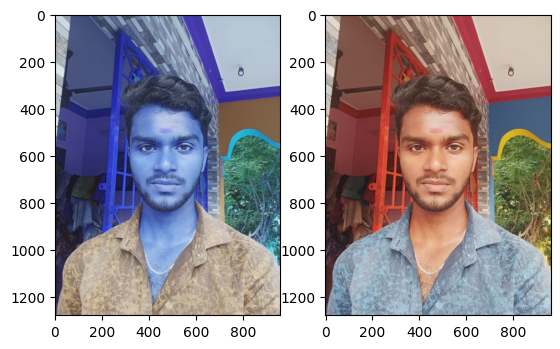

In [18]:
img=cv2.imread("C:\\Users\\rkkab\\DBMS\\WhatsApp Image 2024-12-27 at 15.04.45_4aa526b1.jpg")
plt.subplot(121)
plt.imshow(img)
convert=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(122)
plt.imshow(convert)

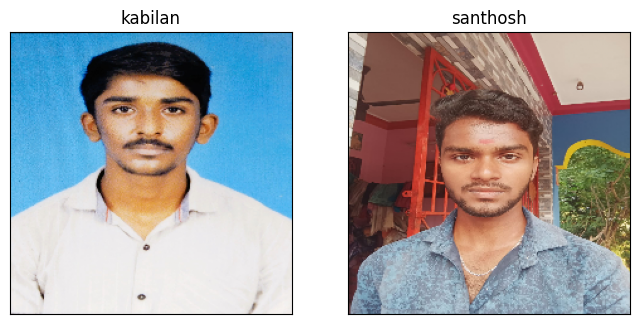

In [30]:
class_names=['kabilan','santhosh']
plt.figure(figsize=(8,7))
for i in range(2):
    plt.subplot(1,2,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images_batch[i])  # Display the image
    plt.title(class_names[i])  
plt.show()

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 64)      

In [43]:
# Numeric labels for training
labels = np.array([0, 1])
test_img="C:\\Users\\rkkab\Downloads\\Firefly 20240628142934.png"
# Preprocess the test image
test_image = preprocess_image(test_img)

# Example validation label
test_label = np.array([0])  # Replace with the correct label
  # Example labels for two images

test_img="C:\\Users\\rkkab\Downloads\\Firefly 20240628142934.png"
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    images_batch, 
    labels,        
    epochs=10,
    validation_data=(test_image, test_label)  
)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.3069 - accuracy: 0.0000e+00 - val_loss: 1.1147 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 302ms/step - loss: 1.0480 - accuracy: 1.0000 - val_loss: 0.8299 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 228ms/step - loss: 0.3777 - accuracy: 1.0000 - val_loss: 0.3913 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 301ms/step - loss: 0.2412 - accuracy: 1.0000 - val_loss: 7.1399 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 285ms/step - loss: 2.0147 - accuracy: 0.5000 - val_loss: 0.2717 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 275ms/step - loss: 0.1046 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 220ms/step - loss: 1.2087 - accuracy: 0.5000 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 8/10
